IMPORT DEPENDENCIES

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


IMPORT DATASET

In [11]:
from sklearn.datasets import load_iris
data = load_iris()

In [12]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name = 'target')

In [13]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


SCALING

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

FIND THE OPTIMAL K

In [17]:
# ELBOW METHOD

inertia = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)  # model initialise
    kmeans.fit(X_scaled)    # model train
    inertia.append(kmeans.inertia_)   # store inertia val


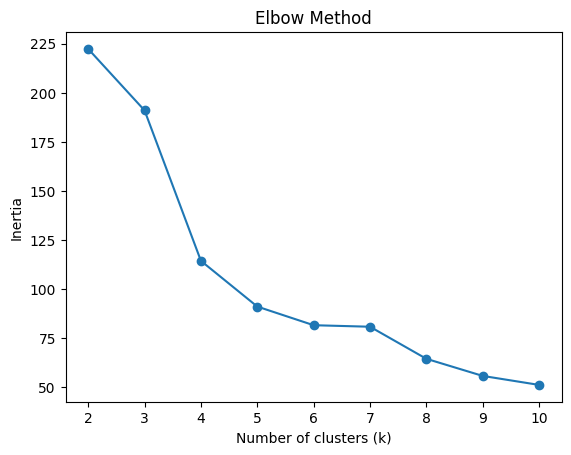

In [19]:
# plotting elbow curve
import matplotlib.pyplot as plt
k_range = range(2,11)
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()  #from graph, visually, k=4

In [20]:
sil_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)


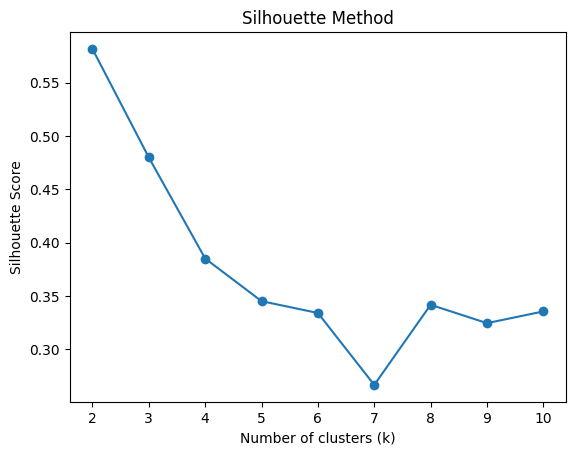

In [21]:
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

In [22]:
print(sil_scores) # gives  k = 2

[np.float64(0.5817500491982808), np.float64(0.4798814508199817), np.float64(0.3850454053045392), np.float64(0.34503345350274617), np.float64(0.3339432304006177), np.float64(0.2664290993719981), np.float64(0.34162906041313373), np.float64(0.32439914389835445), np.float64(0.33540615043919825)]


DIVIDE THE DATASET INTO TRAINING AND TESTING DATASET

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

INITIALIZE THE MODEL

In [24]:
model = KMeans(n_clusters=3, random_state=42) # since eblow method gives k=4 and acc to sihouette score,k = 4....choose k = 3

TRAIN THE MODEL

In [26]:
model.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [27]:
# gettign cluster assignments
clusters = kmeans.labels_

In [28]:
#add clusterd to dataframe
X["Cluster"] = clusters
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,8
2,4.7,3.2,1.3,0.2,8
3,4.6,3.1,1.5,0.2,8
4,5.0,3.6,1.4,0.2,1


In [29]:
#centroids for each cluster
kmeans.cluster_centers_

array([[ 0.79566902,  0.01697137,  0.55546883,  0.42674638],
       [-0.97568985,  0.87650159, -1.30504145, -1.2339577 ],
       [-0.10703162, -0.51180414,  0.26827266,  0.14567295],
       [ 0.93198287,  0.27086486,  0.99721266,  1.39124249],
       [-0.57445998,  1.95749886, -1.27027277, -1.20406322],
       [-0.59776149, -1.5515262 , -0.02822926, -0.08687724],
       [ 0.51871388, -1.51316008,  0.72216011,  0.47099249],
       [ 1.97705575,  0.15576648,  1.44480739,  1.11975111],
       [-1.42321761, -0.07443029, -1.33312185, -1.32367131],
       [ 0.26555958, -0.60676031,  0.77696763,  0.91407583]])